In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('used_car_clean.csv')

print(f"✅ Đã load {len(df)} dòng dữ liệu")
print("\n📋 Cột trong dataset:")
print(df.columns.tolist())

✅ Đã load 8510 dòng dữ liệu

📋 Cột trong dataset:
['Age', 'AskPrice', 'Brand_std', 'Fuel_std', 'Owner_std', 'Transmission_std', 'Year', 'kmDriven', 'km_per_year']


In [5]:
# ============================================
# 2. CHỌN ĐẶC TRƯNG VÀ TARGET
# ============================================
# Điều chỉnh các cột feature theo dataset thực tế của cậu
# Ví dụ dưới đây giả sử có các cột: Year, Kilometer, Age, FuelType, Transmission, Brand

# Các cột số (numeric) - dùng tên cột thực tế trong `used_car_clean.csv`
# Trong dataset này các cột tương ứng là: Year, kmDriven, Age
numeric_features = ['Year', 'kmDriven', 'Age']  # Thay tên cột cho đúng

# Các cột phân loại (categorical) - cần encode (dùng tên thực tế)
# Dataset chứa các cột: Brand_std, Fuel_std, Owner_std, Transmission_std
categorical_features = ['Fuel_std', 'Transmission_std', 'Brand_std', 'Owner_std']  # Thay tên cột cho đúng

# Target: giá xe
target = 'AskPrice'  # Thay tên cột cho đúng

# Xử lý missing values
df = df.dropna(subset=[target])

# One-hot encoding cho categorical features
df_encoded = pd.get_dummies(df[numeric_features + categorical_features], drop_first=True)

# Tách X và y
X = df_encoded
y = df[target]

print(f"\n📊 Số lượng features: {X.shape[1]}")
print(f"📊 Số lượng samples: {X.shape[0]}")



📊 Số lượng features: 40
📊 Số lượng samples: 8510


In [6]:
# ============================================
# 3. CHIA TẬP TRAIN/TEST
# ============================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✅ Train set: {len(X_train)} samples")
print(f"✅ Test set: {len(X_test)} samples")



✅ Train set: 6808 samples
✅ Test set: 1702 samples


In [7]:
# ============================================
# 4. TRAIN 5 MÔ HÌNH HỒI QUY
# ============================================
print("\n🤖 Đang train 5 mô hình...")

models = {}
predictions = {}
results = []

# 4.1 Linear Regression
print("  → Linear Regression...")
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
models['Linear'] = lr
predictions['Linear'] = lr.predict(X_test_scaled)

# 4.2 Polynomial Regression (degree=2)
print("  → Polynomial Regression...")
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
pr = LinearRegression()
pr.fit(X_train_poly, y_train)
models['Polynomial'] = pr
predictions['Polynomial'] = pr.predict(X_test_poly)

# 4.3 Ridge Regression
print("  → Ridge Regression...")
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train_scaled, y_train)
models['Ridge'] = ridge
predictions['Ridge'] = ridge.predict(X_test_scaled)

# 4.4 Lasso Regression
print("  → Lasso Regression...")
lasso = Lasso(alpha=1.0, random_state=42)
lasso.fit(X_train_scaled, y_train)
models['Lasso'] = lasso
predictions['Lasso'] = lasso.predict(X_test_scaled)

# 4.5 ElasticNet Regression
print("  → ElasticNet Regression...")
elastic = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic.fit(X_train_scaled, y_train)
models['ElasticNet'] = elastic
predictions['ElasticNet'] = elastic.predict(X_test_scaled)

print("✅ Hoàn thành training!")


🤖 Đang train 5 mô hình...
  → Linear Regression...
  → Polynomial Regression...
  → Ridge Regression...
  → Lasso Regression...
  → ElasticNet Regression...
✅ Hoàn thành training!
  → Ridge Regression...
  → Lasso Regression...
  → ElasticNet Regression...
✅ Hoàn thành training!


In [8]:
# ============================================
# 5. ĐÁNH GIÁ CÁC MÔ HÌNH
# ============================================
print("\n📊 Đang tính toán metrics...")

for name, y_pred in predictions.items():
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    results.append({
        'Model': name,
        'R²': round(r2, 4),
        'RMSE': round(rmse, 2),
        'MAE': round(mae, 2)
    })

# Tạo DataFrame kết quả
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('R²', ascending=False)

print("\n" + "="*60)
print("📋 BẢNG KẾT QUẢ SO SÁNH CÁC MÔ HÌNH")
print("="*60)
print(results_df.to_string(index=False))
print("="*60)

# Tìm mô hình tốt nhất
best_model = results_df.iloc[0]['Model']
print(f"\n🏆 Mô hình tốt nhất: {best_model}")



📊 Đang tính toán metrics...

📋 BẢNG KẾT QUẢ SO SÁNH CÁC MÔ HÌNH
     Model     R²      RMSE       MAE
Polynomial 0.6758 607973.06 291978.45
     Ridge 0.5935 680822.20 391360.78
     Lasso 0.5935 680795.87 391341.93
    Linear 0.5934 680873.39 391411.61
ElasticNet 0.5548 712431.43 391702.03

🏆 Mô hình tốt nhất: Polynomial



📊 Đang tạo biểu đồ...
✅ Đã lưu: r2_comparison.png
✅ Đã lưu: r2_comparison.png


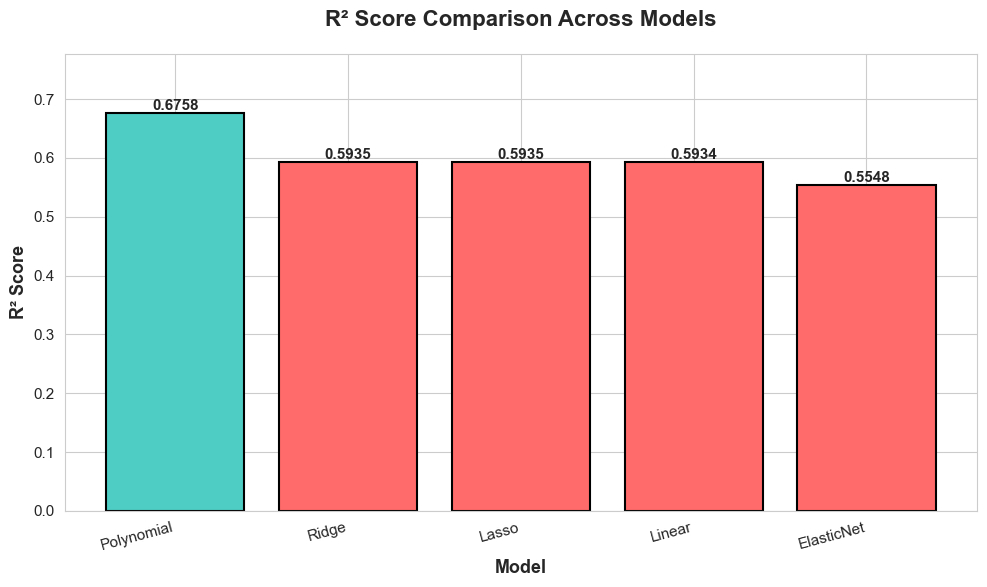

✅ Đã lưu: actual_vs_predicted.png


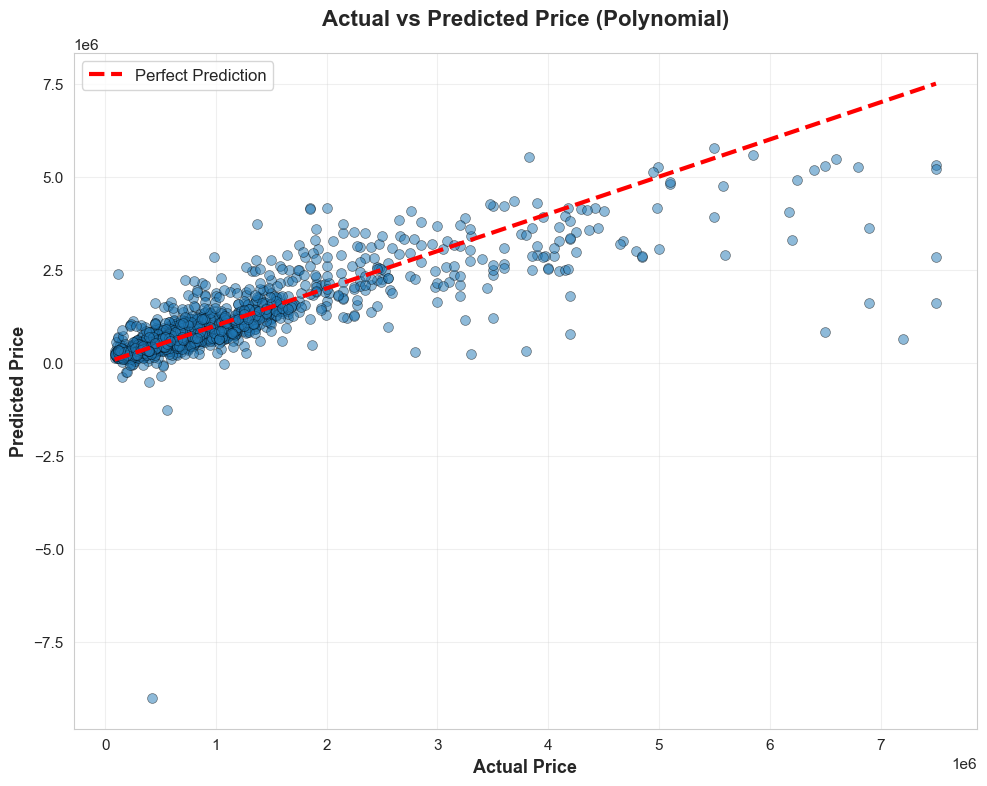

✅ Đã lưu: error_metrics_comparison.png


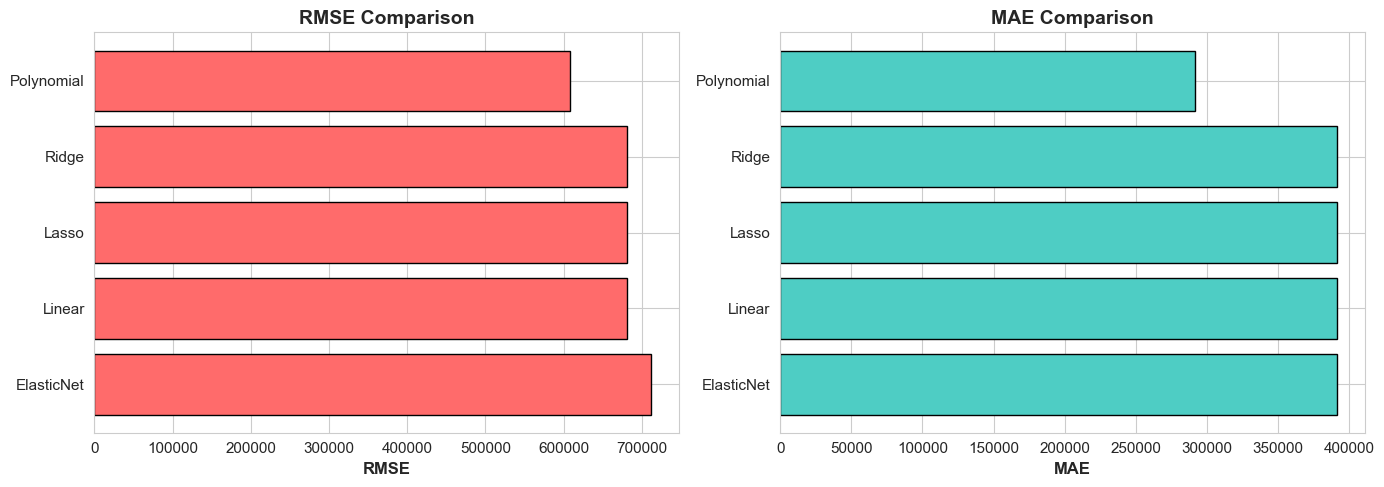

In [9]:
# ============================================
# 6. VISUALIZATION
# ============================================
print("\n📊 Đang tạo biểu đồ...")

# Set style
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 11

# 6.1 Biểu đồ so sánh R²
plt.figure(figsize=(10, 6))
colors = ['#FF6B6B' if x != best_model else '#4ECDC4' for x in results_df['Model']]
bars = plt.bar(results_df['Model'], results_df['R²'], color=colors, edgecolor='black', linewidth=1.5)

# Thêm giá trị lên đầu cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.title('R² Score Comparison Across Models', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Model', fontsize=13, fontweight='bold')
plt.ylabel('R² Score', fontsize=13, fontweight='bold')
plt.ylim(0, max(results_df['R²']) * 1.15)
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.savefig('r2_comparison.png', dpi=300, bbox_inches='tight')
print("✅ Đã lưu: r2_comparison.png")
plt.show()

# 6.2 Biểu đồ Actual vs Predicted (mô hình tốt nhất)
plt.figure(figsize=(10, 8))
y_pred_best = predictions[best_model]

plt.scatter(y_test, y_pred_best, alpha=0.5, s=50, edgecolors='k', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=3, label='Perfect Prediction')

plt.title(f'Actual vs Predicted Price ({best_model})', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Actual Price', fontsize=13, fontweight='bold')
plt.ylabel('Predicted Price', fontsize=13, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('actual_vs_predicted.png', dpi=300, bbox_inches='tight')
print("✅ Đã lưu: actual_vs_predicted.png")
plt.show()

# 6.3 Biểu đồ so sánh RMSE và MAE
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# RMSE
axes[0].barh(results_df['Model'], results_df['RMSE'], color='#FF6B6B', edgecolor='black')
axes[0].set_xlabel('RMSE', fontsize=12, fontweight='bold')
axes[0].set_title('RMSE Comparison', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()

# MAE
axes[1].barh(results_df['Model'], results_df['MAE'], color='#4ECDC4', edgecolor='black')
axes[1].set_xlabel('MAE', fontsize=12, fontweight='bold')
axes[1].set_title('MAE Comparison', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('error_metrics_comparison.png', dpi=300, bbox_inches='tight')
print("✅ Đã lưu: error_metrics_comparison.png")
plt.show()

In [10]:
# ============================================
# 7. EXPORT KẾT QUẢ
# ============================================
results_df.to_csv('regression_results.csv', index=False)
print("\n✅ Đã lưu kết quả: regression_results.csv")

print("\n" + "="*60)
print("🎉 HOÀN THÀNH!")
print("="*60)
print("📁 Files đã tạo:")
print("  - r2_comparison.png")
print("  - actual_vs_predicted.png")
print("  - error_metrics_comparison.png")
print("  - regression_results.csv")
print("="*60)


✅ Đã lưu kết quả: regression_results.csv

🎉 HOÀN THÀNH!
📁 Files đã tạo:
  - r2_comparison.png
  - actual_vs_predicted.png
  - error_metrics_comparison.png
  - regression_results.csv
